### CHALLENGE_02

Build a movie recommender system using a Python library such as Surprise or FastFM.

GroupLens Research has collected and made available rating data sets from the MovieLens web site [http://movielens.org](http://movielens.org).

#### MovieLens Latest Datasets

Small: 100,000 ratings and 3,600 tag applications applied to 9,000 movies by 600 users.

Last updated 9/2018.

* [README.html](http://files.grouplens.org/datasets/movielens/ml-latest-small-README.html)

* [ml-latest-small.zip](http://files.grouplens.org/datasets/movielens/ml-latest-small.zip) (size: 1 MB)

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from surprise import (Reader, Dataset, accuracy,
                      NormalPredictor, BaselineOnly,
                      SVD, SVDpp, NMF,
                      KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline, 
                      SlopeOne,
                      CoClustering)
from surprise.model_selection import cross_validate
from surprise.accuracy import rmse
from surprise.model_selection import train_test_split

In [2]:
# Ignore warnings
warnings.filterwarnings("ignore")

plt.style.use("ggplot")

In [3]:
# Load Dataset
ratings = pd.read_csv("data/ratings.csv")
ratings.sample(2)

,userId,movieId,rating,timestamp
30587,213,59615,3.5,1316196834
25662,177,70183,4.0,1435837313


In [4]:
# Check Datatypes
ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [5]:
# Range of ratings
ratings["rating"].min(), ratings["rating"].max()

(0.5, 5.0)

In [6]:
# Check Missing Values
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

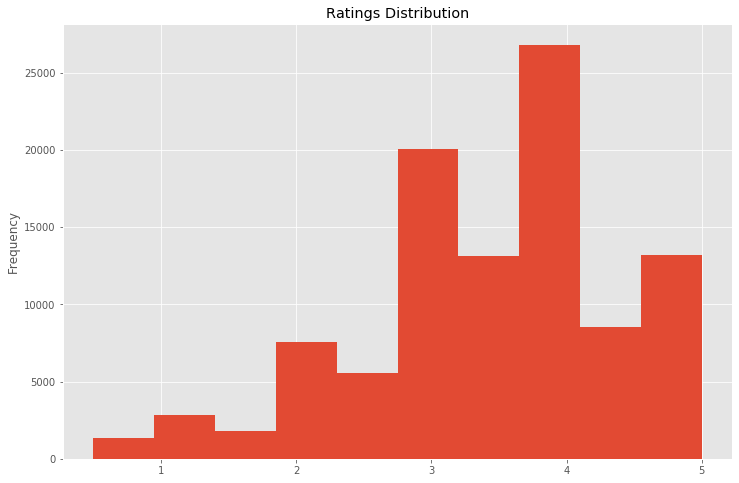

In [7]:
# Distribution of Ratings
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(ratings["rating"])
ax.set_ylabel("Frequency")
ax.set_title("Ratings Distribution")
plt.savefig("images/ratings_distribution.svg")

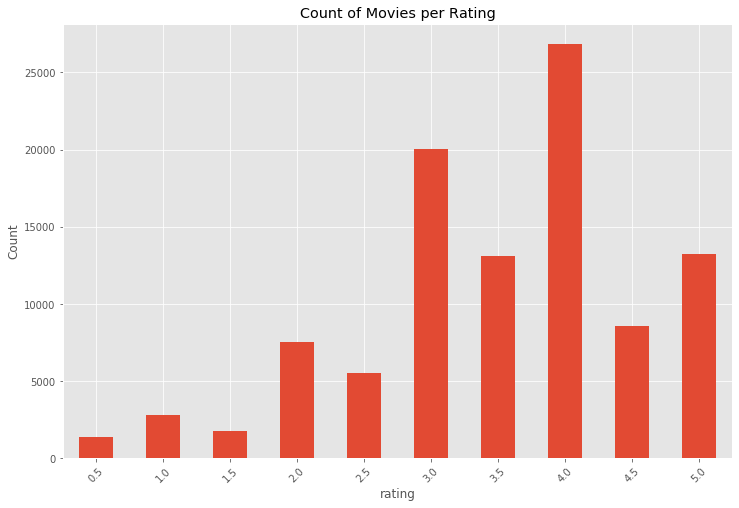

In [8]:
# Count of Movies per Rating
fig, ax = plt.subplots(figsize=(12, 8))
ratings.groupby(["rating"])["rating"].count().plot(kind="bar", rot=45, ax=ax)
ax.set_ylabel("Count")
ax.set_title("Count of Movies per Rating")
plt.savefig("images/Count_Movies_per_Rating.svg")

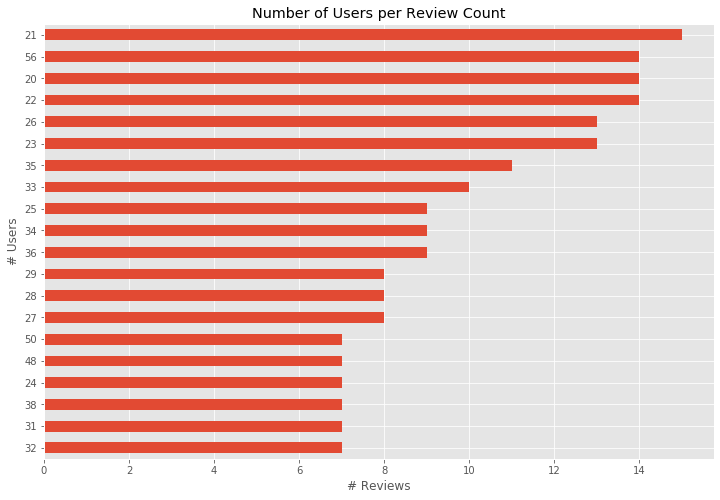

In [9]:
# Number of Users per Review Count
fig, ax = plt.subplots(figsize=(12, 8))
ratings.groupby(["userId"])["rating"].count().value_counts().sort_values(ascending=True)[-20:].plot(kind="barh", ax=ax, rot=0)
ax.set_xlabel("# Reviews")
ax.set_ylabel("# Users")
ax.set_title("Number of Users per Review Count")
plt.savefig("images/Number_of_User_per_Review_Count.svg")

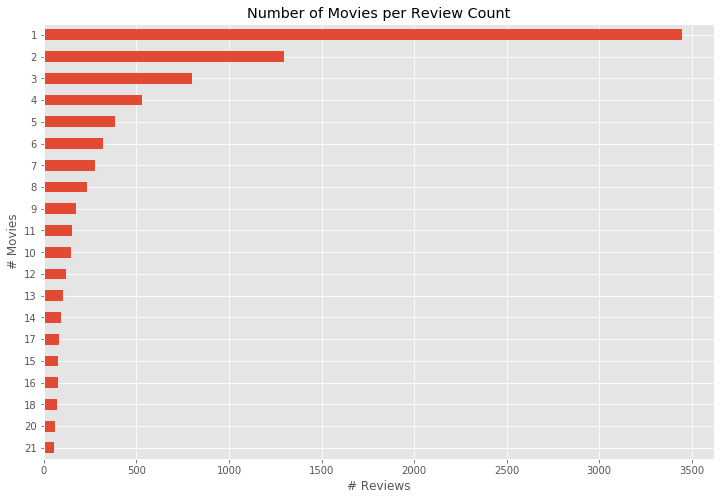

In [10]:
# Number of Movies per Review Count
fig, ax = plt.subplots(figsize=(12, 8))
ratings.groupby(["movieId"])["rating"].count().value_counts().sort_values(ascending=True)[-20:].plot(kind="barh", ax=ax, rot=0)
ax.set_xlabel("# Reviews")
ax.set_ylabel("# Movies")
ax.set_title("Number of Movies per Review Count")
plt.savefig("images/Number_of_Movies_per_Review_Count.svg")

In [11]:
# Instiate Reader Object
reader = Reader(rating_scale=(0.5, 5))

In [12]:
# Load Dataset to Surprise
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [13]:
# Grid Search Cross Validation
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }

model = BaselineOnly(bsl_options=bsl_options)
cross_validate(model, data, measures=['RMSE'], cv=3, verbose=2)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE of algorithm BaselineOnly on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.8694  0.8707  0.8710  0.8704  0.0007  
Fit time          0.11    0.12    0.13    0.12    0.01    
Test time         0.21    0.19    0.19    0.20    0.01    


{'test_rmse': array([0.86941984, 0.87074039, 0.87102452]),
 'fit_time': (0.10970115661621094, 0.1226341724395752, 0.1295320987701416),
 'test_time': (0.20724105834960938, 0.1949310302734375, 0.1865401268005371)}

In [14]:
# Train and Test set split
train, test = train_test_split(data, test_size=0.25)

In [15]:
# Instantiate Best Model
model = BaselineOnly(bsl_options=bsl_options)

In [16]:
# Make Predictions
pred = model.fit(train).test(test)

Estimating biases using als...


In [17]:
# Check Accuracy
accuracy.rmse(pred)

RMSE: 0.8712


0.87121107155288